In [8]:
import json
from pathlib import Path

import matplotlib.pyplot as plt

normal_map = Path(r"S:\E_ResearchData\evdplanner\Templates\colin\map_skin_normal.png")
keypoint_json = Path(r"S:\E_ResearchData\evdplanner\Templates\colin\projected_skin.kp.json")

In [23]:
color_map = {
    "nasion": "orangered",
    "canthus": "limegreen",
    "auricle": "royalblue",
}


def get_color(name: str) -> str:
    for key, value in color_map.items():
        if key in name.lower():
            return value
    return "black"

x_shape=2048, y_shape=1024


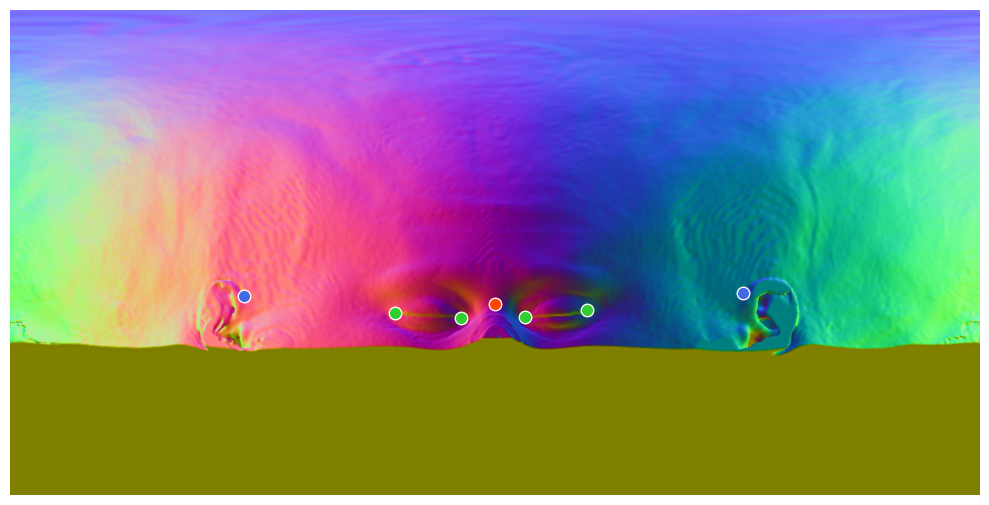

In [26]:
image = plt.imread(normal_map)

with open(keypoint_json) as f:
    keypoints = json.load(f)

y_shape, x_shape = image.shape[:2]
print(f"{x_shape=}, {y_shape=}")

fig, ax = plt.subplots(figsize=(10, 20))
ax.imshow(image)

for keypoint in keypoints:
    name = keypoint["label"]
    position = keypoint["position"]

    position[0] *= x_shape
    position[1] *= y_shape

    ax.plot(position[0], position[1], "o", color="snow", markersize=9)
    ax.plot(position[0], position[1], "o", color=get_color(name), markersize=7)

plt.axis("off")
plt.tight_layout()
plt.show()